# Nacionalidad

In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append('../config')
from mpl_settings_v3 import *

## Seteamos semilla random para reproducibilidad
np.random.seed(0)

In [2]:
data_dir = '../datasets/sneep_2017_diplodatos.csv'
data_raw = pd.read_csv(data_dir, index_col=0)

/home/lucia/.anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Distribución por nacionalidad
g = data_raw["nacionalidad_descripcion"]
df = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df

,counts,percentage
Argentina,80175,94.192768
Paraguaya,1694,1.990178
Peruana,963,1.131371
Boliviana,959,1.126671
Chilena,352,0.413544
Uruguaya,326,0.382998
Otras,237,0.278437
Colombiana,223,0.261989
Brasileña,91,0.106910
China,28,0.032896


In [4]:
a = df.iloc[0][0]
b = df.iloc[1:]
b = b.sum()[0]

nacionalidad = ['Argentinos']*int(a) + ['Extranjeros']*int(b)

nacionalidad_data = pd.DataFrame(nacionalidad) 

nacionalidad_data = nacionalidad_data.rename(columns={0: 'nacionalidad'})

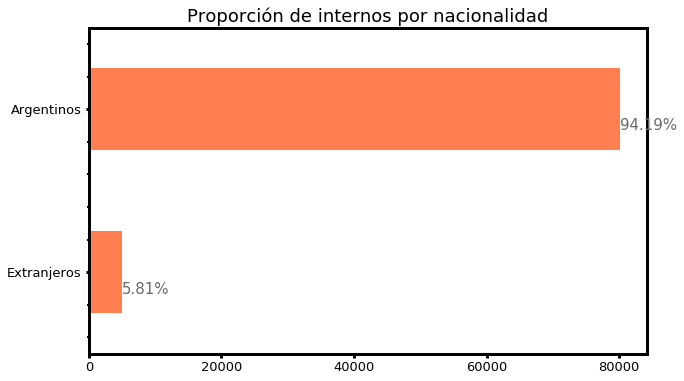

In [5]:
ax = nacionalidad_data["nacionalidad"].value_counts().plot(kind='barh', figsize=(10,6), color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Proporción de internos por nacionalidad", fontsize=18)
ax.set_xlabel("", fontsize=18);
ax.set_xticks([0, 20000, 40000, 60000, 80000])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

## Establecimientos federales

In [6]:
mask = data_raw['jurisdiccion_descripcion'] == 'FEDERAL'

g = data_raw[mask]["nacionalidad_descripcion"]
df = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df

,counts,percentage
Argentina,5796,78.600488
Paraguaya,465,6.305940
Boliviana,448,6.075400
Peruana,368,4.990507
Otras,83,1.125576
Chilena,60,0.813670
Colombiana,49,0.664497
Uruguaya,46,0.623813
Brasileña,30,0.406835
Ecuatoriana,13,0.176295


In [7]:
a = df.iloc[0][0]
b = df.iloc[1:]
b = b.sum()[0]

nacionalidad = ['Argentinos']*int(a) + ['Extranjeros']*int(b)

nacionalidad_data = pd.DataFrame(nacionalidad) 

nacionalidad_data = nacionalidad_data.rename(columns={0: 'nacionalidad'})

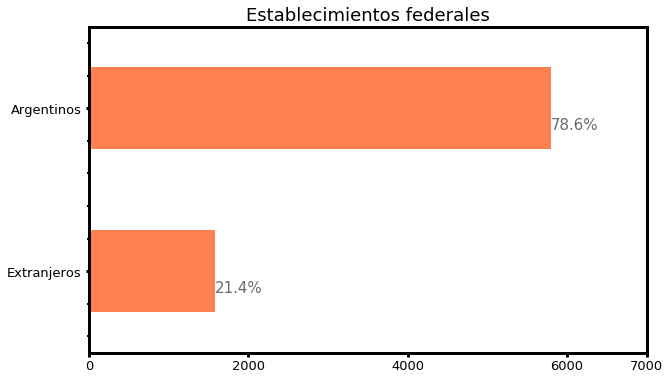

In [8]:
ax = nacionalidad_data["nacionalidad"].value_counts().plot(kind='barh', figsize=(10,6), color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Establecimientos federales", fontsize=18)
ax.set_xlabel("", fontsize=18);
ax.set_xticks([0, 2000, 4000, 6000, 7000])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

## Establecimientos no federales

In [9]:
mask2 = ~(data_raw['jurisdiccion_descripcion'] == 'FEDERAL')

g = data_raw[mask2]["nacionalidad_descripcion"]
df = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df

,counts,percentage
Argentina,74379,95.671692
Paraguaya,1229,1.580829
Peruana,595,0.765332
Boliviana,511,0.657285
Chilena,292,0.375592
Uruguaya,280,0.360156
Colombiana,174,0.223811
Otras,154,0.198086
Brasileña,61,0.078463
China,23,0.029584


In [10]:
a = df.iloc[0][0]
b = df.iloc[1:]
b = b.sum()[0]

nacionalidad = ['Argentinos']*int(a) + ['Extranjeros']*int(b)

nacionalidad_data = pd.DataFrame(nacionalidad) 

nacionalidad_data = nacionalidad_data.rename(columns={0: 'nacionalidad'})

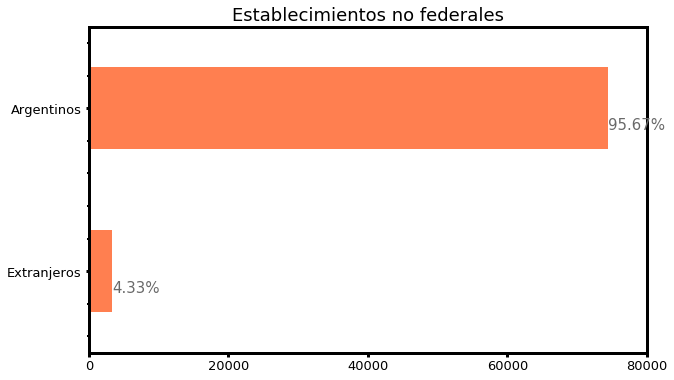

In [11]:
ax = nacionalidad_data["nacionalidad"].value_counts().plot(kind='barh', figsize=(10,6), color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Establecimientos no federales", fontsize=18)
ax.set_xlabel("", fontsize=18);
ax.set_xticks([0, 20000, 40000, 60000, 80000])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='dimgrey')
    
# invert for largest on top 
ax.invert_yaxis()